# Crowdedness at the Campus Gym

<p style="text-align:center;">
  <img src="https://images.unsplash.com/photo-1561214078-f3247647fc5e?ixlib=rb-4.0.3&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=870&q=80" width="800" height="100">
  <br>
  Source: <a href="https://unsplash.com/">Unsplash</a>
</p>

Our aim in this project is to solve the common problem of crowdedness at the gym. If you're someone who enjoys working out, but dislikes waiting in long lines to use the machines, then this project is for you. We'll develop a predictive model that can accurately estimate the best time to go to the gym to avoid crowds and enjoy a seamless workout experience. Using the dataset [Crowdedness at the Campus Gym](https://www.kaggle.com/datasets/nsrose7224/crowdedness-at-the-campus-gym), which provides historic information about the gym's crowdedness on specific days and hours, along with other relevant features, such as weather data, we will develop a predictive model that can accurately estimate how crowded the gym will be at any given time. Our goal is to identify the most critical features and eliminate any redundancies to make our predictions as accurate as possible. Join us as we work towards creating a solution that will help gym-goers make the most of their workout sessions.

## Import Libraries and Load the Data

Before we begin, let's get some basic information about the dataset 'Crowdedness in the Gym'.

This dataset contains over 60,000 observations about how many people were at the gym on a particular day and time. It contains 11 columns that contain the following information.

- `number_people`: this is the number of people at the gym at each observation. This will be our target variable or label.
- `date`: a string value with the specific date and time information.
- `timestamp`: an integer (int), with the number of seconds since the start of the day (00:00).
- `dayofweek`: an integer (int). 0 is equal to Monday and 6 is equal to Sunday.
- `is_weekend`: a Boolean value defining if this observation happened during a weekend. 1 for yes, 0 for no.
- `is_holiday`: a Boolean value defining if the observation happened during a holiday. 1 for yes, 0 for no.
- `temperature`: a float, defining the temperature during the day of the observation in Fahrenheit.
- `isstartof_semester`: a Boolean defining if the observation happened in the first 2 weeks of a semester. 1 for yes, 0 for no.
- `is_during_semester`: a Boolean defining if the observation happened during the active semester. 1 for yes, 0 for no.
- `month`: an integer (int) defining the month of the year. 1 is equal to January, 12 is equal to December.
- `hour`: an integer (int) for the hour of the day from 0 to 23.

Let's import the necessary libraries for manipulating and exploring the data.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

The dataset csv file is called `crowdedness_gym_data.csv`. We'll load the dataset using Pandas `read_csv()` method and assign it to the variable `gym`.

In [2]:
# Load the dataset
gym = pd.read_csv('crowdedness_gym_data.csv')

## EDA and Cleaning the Data

To gain a better understanding of the dataset, we will perform some basic exploration commands, starting with `.head()` to obtain an overview of the data.

In [3]:
gym.head()

,number_people,date,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
0,37,2015-08-14 17:00:11-07:00,61211,4,0,0,71.76,0,0,8,17
1,45,2015-08-14 17:20:14-07:00,62414,4,0,0,71.76,0,0,8,17
2,40,2015-08-14 17:30:15-07:00,63015,4,0,0,71.76,0,0,8,17
3,44,2015-08-14 17:40:16-07:00,63616,4,0,0,71.76,0,0,8,17
4,45,2015-08-14 17:50:17-07:00,64217,4,0,0,71.76,0,0,8,17


The dataset appears to be well-organized and devoid of any irregularities.. To further explore the data, we'll check its shape using `.shape`.

In [4]:
print(f'Dataset contains {gym.shape[0]} rows and {gym.shape[1]} columns')

Dataset contains 62184 rows and 11 columns


The dataset comprises 62,184 observations, and 11 features.

To gather more information on each feature, we'll use `.info()`

In [5]:
# Check dataset information
gym.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62184 entries, 0 to 62183
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   number_people         62184 non-null  int64  
 1   date                  62184 non-null  object 
 2   timestamp             62184 non-null  int64  
 3   day_of_week           62184 non-null  int64  
 4   is_weekend            62184 non-null  int64  
 5   is_holiday            62184 non-null  int64  
 6   temperature           62184 non-null  float64
 7   is_start_of_semester  62184 non-null  int64  
 8   is_during_semester    62184 non-null  int64  
 9   month                 62184 non-null  int64  
 10  hour                  62184 non-null  int64  
dtypes: float64(1), int64(9), object(1)
memory usage: 5.2+ MB


The majority of the data in the dataframe consists of numeric integers, although there are a few exceptions such as the temperature feature, which is a float (as temperatures are not typically whole numbers), and the date object. It is worth noting that the dataframe has no null values.

We can gather additional information by using `.describe()`, which provides basic statistical information about the dataset.

In [6]:
gym.describe()

,number_people,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
count,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000
mean,29.072543,45799.437958,2.982504,0.282870,0.002573,58.557108,0.078831,0.660218,7.439824,12.236460
std,22.689026,24211.275891,1.996825,0.450398,0.050660,6.316396,0.269476,0.473639,3.445069,6.717631
min,0.000000,0.000000,0.000000,0.000000,0.000000,38.140000,0.000000,0.000000,1.000000,0.000000
25%,9.000000,26624.000000,1.000000,0.000000,0.000000,55.000000,0.000000,0.000000,5.000000,7.000000
50%,28.000000,46522.500000,3.000000,0.000000,0.000000,58.340000,0.000000,1.000000,8.000000,12.000000
75%,43.000000,66612.000000,5.000000,1.000000,0.000000,62.280000,0.000000,1.000000,10.000000,18.000000
max,145.000000,86399.000000,6.000000,1.000000,1.000000,87.170000,1.000000,1.000000,12.000000,23.000000


After inspecting the statistics, the dataset appears to be fairly straightforward. However, the `date` column, being an object, has no statistics, and the `timestamp` feature may be difficult to work with.

Most of the other features seem promising, including binary features such as `is_holiday` and `is_weekend`.

However, we have identified the `date` column as a problematic feature, as it duplicates information that is already provided by other features in the dataset. Therefore, we will remove the `date` column using the `.drop()` method. We will then verify that the column has been removed by running `.head()` again.

In [7]:
# Drop 'date' from 'gym_clean' dataframe
gym_clean = gym.drop('date', axis=1)
gym_clean.head()

,number_people,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
0,37,61211,4,0,0,71.76,0,0,8,17
1,45,62414,4,0,0,71.76,0,0,8,17
2,40,63015,4,0,0,71.76,0,0,8,17
3,44,63616,4,0,0,71.76,0,0,8,17
4,45,64217,4,0,0,71.76,0,0,8,17


We are now ready to begin with our Exploratory Data Analysis (EDA).

To start off, we will conduct a Univariate Analysis on some of the features. This will involve taking a closer look at the distributions of certain features.

Our focus will be on the `month`, `day_of_week`, and `hour` features, as they are likely to have the most significant impact on the number of people in the gym. We will create bar plots to visualize these distributions.

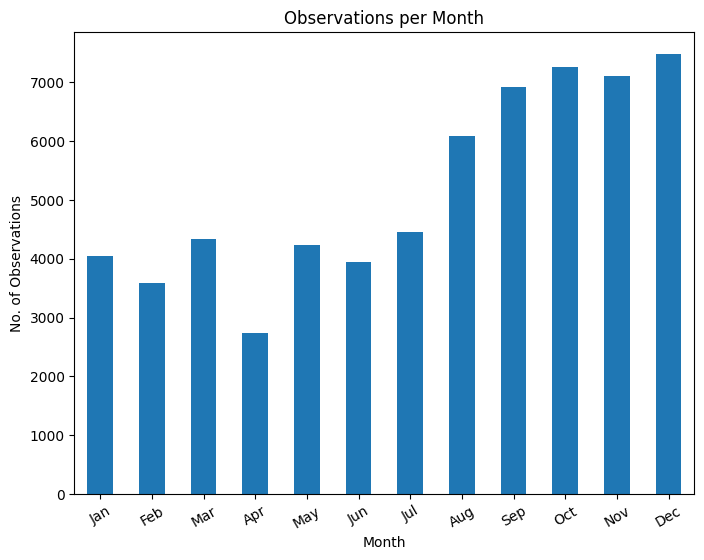

In [8]:
# Group the data by month and count the number of observations
month_counts = gym_clean.groupby('month')['month'].count()

# Plot the results using a bar chart
month_counts.plot(kind='bar', figsize=(8, 6))
plt.title('Observations per Month')
plt.ylabel('No. of Observations')
plt.xlabel('Month')

# Set the x-tick labels to be the month names
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(ticks=np.arange(12), labels=month_names, rotation=30)

plt.show()

After seeing the plot, it appears that December and January have the highest number of observations, indicating they are popular months for gym visits. Additionally, the observations at the beginning of the academic year (August and September) are higher compared to the end (April), which could be due to people having more motivation to exercise at the start of the academic year and being more focused on studying and exams towards the end.

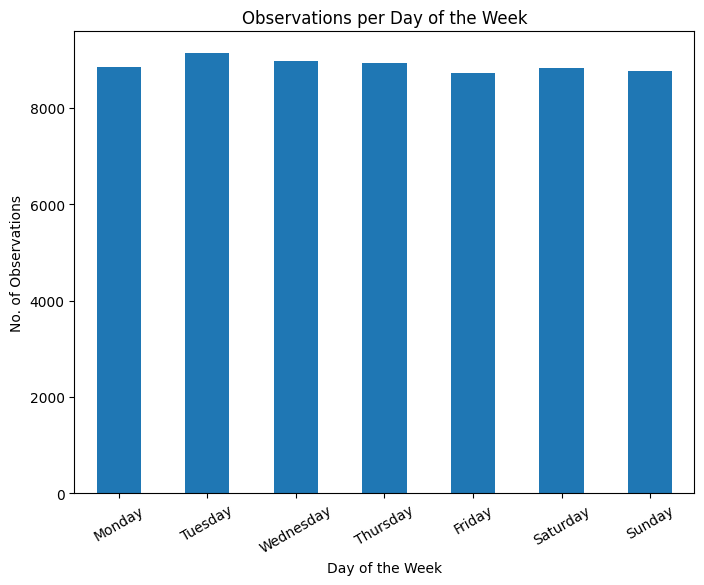

In [9]:
plt.figure(figsize=(8, 6))

# Frequency count of each day of the week
gym_clean['day_of_week'].value_counts().sort_index().plot(kind='bar')
plt.title('Observations per Day of the Week')
plt.ylabel('No. of Observations')
plt.xlabel('Day of the Week')

# Get the day names
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.xticks(range(7), day_names, rotation=30)

plt.show()

Based on the above results, we can observe that the number of gym visitors is relatively consistent throughout the week, with a slightly higher number of visitors on Tuesday compared to other days. Additionally, we do not see any significant drop in the number of observations on weekends, indicating that the gym is equally popular on weekends as on weekdays.

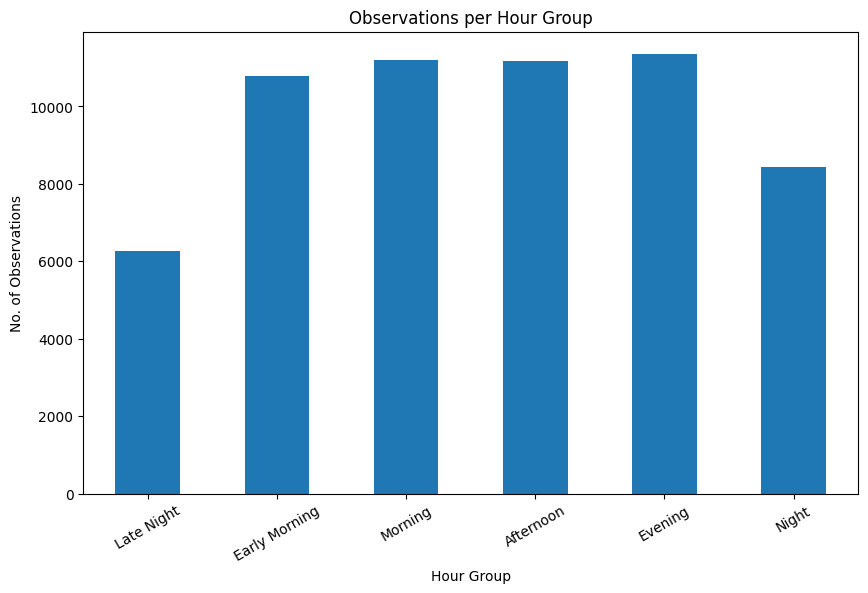

In [10]:
# Create new dataframe for visualization
gym_viz = gym_clean.copy()

# Group hours into broader time intervals
gym_viz['hour_group'] = pd.cut(gym_viz['hour'], bins=[0, 4, 8, 12, 16, 20, 24], 
                               labels=['Late Night', 'Early Morning', 'Morning', 
                                       'Afternoon', 'Evening', 'Night'])

# Plot bar chart
plt.figure(figsize=(10, 6))
gym_viz.groupby('hour_group')['hour'].count().plot(kind='bar')
plt.xlabel('Hour Group')
plt.xticks(rotation=30)
plt.ylabel('No. of Observations')
plt.title('Observations per Hour Group')
plt.show()

We can observe that the gym is busiest during regular hours, with the highest number of visitors in the morning, afternoon, and evening. However, there is still a considerable number of visitors who prefer to work out during the early morning and night hours. Therefore, it may be a good strategy to visit the gym during off-peak hours, such as night or even better late at night, to avoid crowds and long wait times for equipment.

This is an interesting observation, but to gain more insights in building a model to predict the number of gym visitors (target variable), we can utilize Bivariate Analysis which examines the relationship between two variables to identify any correlation between them.

To do this, we can plot the correlation between the number of gym visitors and the variables of month, day of the week, and hour of the day. This will allow us to gain a better understanding of how these variables affect the number of gym visitors and inform our model-building process.

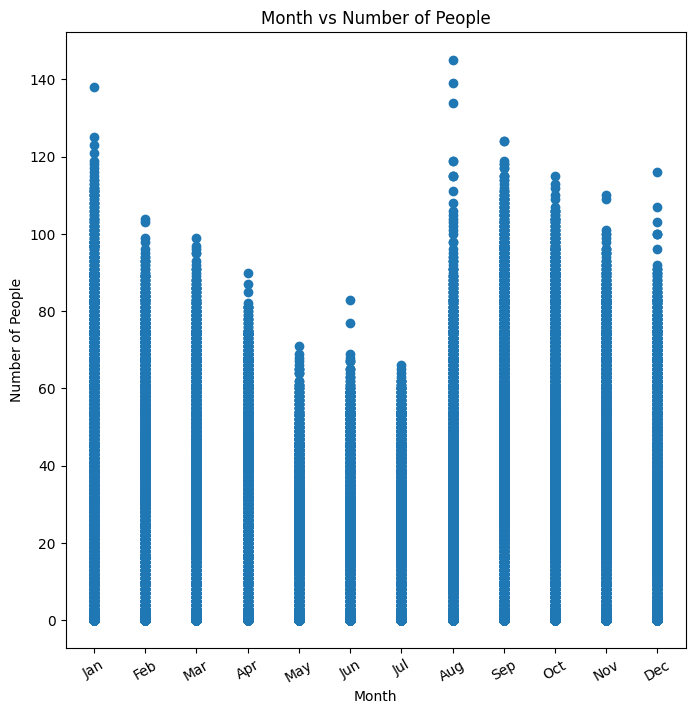

In [11]:
plt.figure(figsize=(8, 8))

# Scatter plot between 'month' and 'number_people'
plt.scatter(gym_clean['month'], gym_clean['number_people'])
plt.title('Month vs Number of People')
plt.ylabel('Number of People')
plt.xlabel('Month')
plt.xticks(ticks=np.arange(1, 13), labels=month_names, rotation=30)

plt.show()

A more precise understanding of the relationship between the month variable and the number of people reveals that August and January have the highest peaks of gym visitors. Additionally, there is a noticeable decline in the number of visitors towards the end of the semester (May) compared to the beginning.

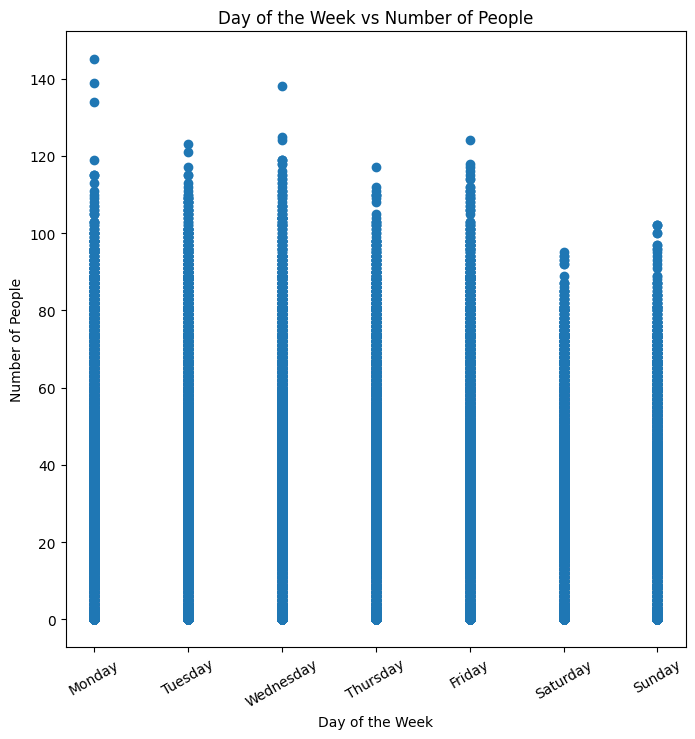

In [12]:
plt.figure(figsize=(8, 8))

# Scatter plot between 'day_of_week' and 'number_people'
plt.scatter(gym_clean['day_of_week'], gym_clean['number_people'])
plt.title('Day of the Week vs Number of People')
plt.ylabel('Number of People')
plt.xlabel('Day of the Week')
plt.xticks(range(7), day_names, rotation=30)

plt.show()

It is evident that the highest peaks occur on Mondays and Wednesdays, while Saturdays have the lowest peaks.

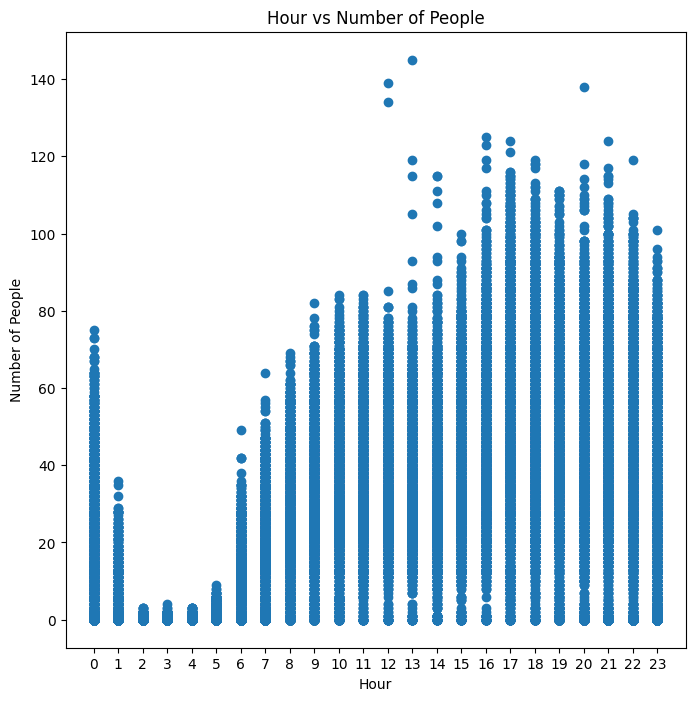

In [13]:
plt.figure(figsize=(8, 8))

# Scatter plot between 'hour' and 'number_people'
plt.scatter(gym_clean['hour'], gym_clean['number_people'])
plt.title('Hour vs Number of People')
plt.ylabel('Number of People')
plt.xlabel('Hour')

# Set the xticks
xticks = [i for i in range(0, 24)]
plt.xticks(xticks)

plt.show()

After analyzing the scatter plot between `hour` and `number_people`, again we can observe some interesting trends. The peak number of people occurs during the afternoon and evening hours, which is expected as these are typically convenient times for people to visit the gym. However, what is surprising is the relatively high number of people visiting the gym at night. On the other hand, the part of late night and early morning hours (2am to 5am) have very small peaks, indicating that very few people prefer to workout at these hours.

To gain more insights, we will utilize a set of tools such as correlation tables, pairplots, and heatmaps. These tools will allow us to quickly visualize the relationships between each variable and our target variable `number_people`.

To start off, we will use a correlation table.

In [14]:
# Find correlation matrix
corr_mat = gym_clean.corr()
corr_mat

,number_people,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
number_people,1.000000,0.550218,-0.162062,-0.173958,-0.048249,0.373327,0.182683,0.335350,-0.097854,0.552049
timestamp,0.550218,1.000000,-0.001793,-0.000509,0.002851,0.184849,0.009551,0.044676,-0.023221,0.999077
day_of_week,-0.162062,-0.001793,1.000000,0.791338,-0.075862,0.011169,-0.011782,-0.004824,0.015559,-0.001914
is_weekend,-0.173958,-0.000509,0.791338,1.000000,-0.031899,0.020673,-0.016646,-0.036127,0.008462,-0.000517
is_holiday,-0.048249,0.002851,-0.075862,-0.031899,1.000000,-0.088527,-0.014858,-0.070798,-0.094942,0.002843
temperature,0.373327,0.184849,0.011169,0.020673,-0.088527,1.000000,0.093242,0.152476,0.063125,0.185121
is_start_of_semester,0.182683,0.009551,-0.011782,-0.016646,-0.014858,0.093242,1.000000,0.209862,-0.137160,0.010091
is_during_semester,0.335350,0.044676,-0.004824,-0.036127,-0.070798,0.152476,0.209862,1.000000,0.096556,0.045581
month,-0.097854,-0.023221,0.015559,0.008462,-0.094942,0.063125,-0.137160,0.096556,1.000000,-0.023624
hour,0.552049,0.999077,-0.001914,-0.000517,0.002843,0.185121,0.010091,0.045581,-0.023624,1.000000


The correlation matrix provides valuable information on the strength and direction of the relationship between each variable and the target variable, `number_people`. The variables with the highest positive correlation to `number_people` are `hour`, `temperature`, and surprisingly, `is_during_semester`. On the other hand, `is_weekend` and `day_of_week` have negative correlations to `number_people`.

Furthermore, it appears that `timestamp` and `hour` are highly correlated, indicating that one of these variables may be redundant.

One way to enhance our understanding of the relationships among variables is by using Seaborn's `heatmap()` function. It provides a visual representation of the correlations, which can make it easier to identify patterns and insights.

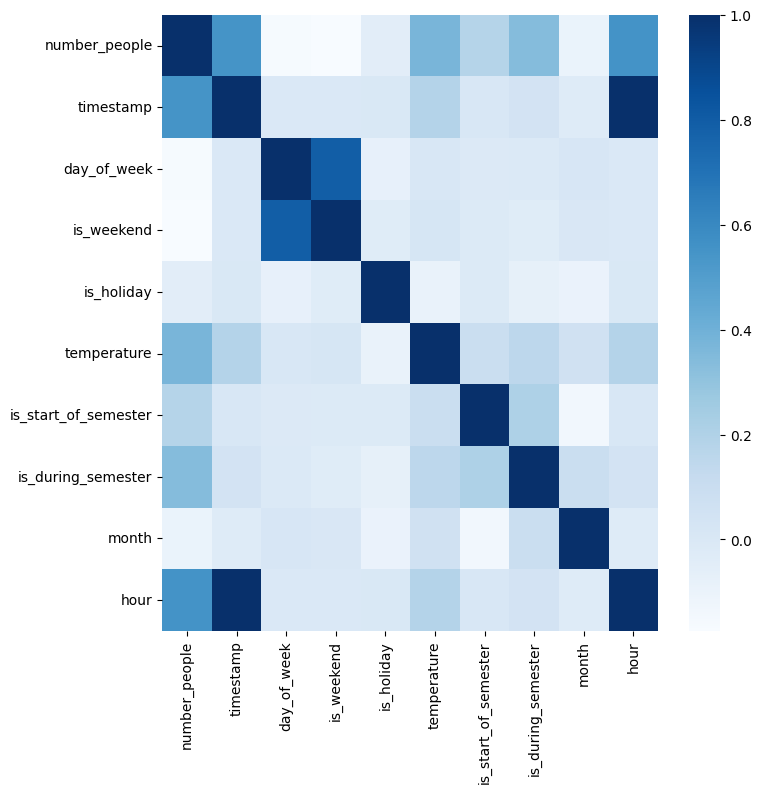

In [15]:
plt.figure(figsize=(8, 8))
sns.heatmap(corr_mat, cmap='Blues')

plt.show()

The results confirm our previous observations that the `hour`, `temperature`, and `is_during_semester` variables are the most significant factors affecting the number of people visiting the gym.

Furthermore, as previously discussed, the `timestamp` variable appears to be redundant. Thus, we will drop the `timestamp` column before proceeding with model building.

In [16]:
gym_clean = gym_clean.drop('timestamp', axis=1)
gym_clean.head()

,number_people,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
0,37,4,0,0,71.76,0,0,8,17
1,45,4,0,0,71.76,0,0,8,17
2,40,4,0,0,71.76,0,0,8,17
3,44,4,0,0,71.76,0,0,8,17
4,45,4,0,0,71.76,0,0,8,17


## Preparing to Build Our Model

Now that we have a cleaned dataset and have analyzed and removed any variables that we consider unimportant or too noisy for our model, the next step is to prepare our data for modeling.

Since we're building a stochastic gradient descent regressor, we will need to import several tools from the `SkLearn` library, including:

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor

To prepare our data for modeling, we must split it into training and testing sets. We will use a test size of 30%, which means that 70% of the data will be used for training and 30% for testing. Setting a random state will enable us to replicate the results in the future.

In [18]:
# Get the numpy representation of the data
data = gym_clean.values

# Split data into X features and y target variable
X = data[:, 1:]
y = data[:, 0]

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.30,
                                                    random_state=42)

Let's verify that the shape of each set is correct.

In [19]:
print(f"Training features shape: {X_train.shape}")
print(f"Testing features shape: {X_test.shape}")
print(f"Training label shape: {y_train.shape}")
print(f"Testing label shape: {y_test.shape}")

Training features shape: (43528, 8)
Testing features shape: (18656, 8)
Training label shape: (43528,)
Testing label shape: (18656,)


We'll proceed with building the model using `SGDRegressor`. We'll set the learning rate to `optimal`, use `huber` loss as the loss function, and apply `elasticnet` as the penalty. After this, we'll fit the model with the training data. We'll also set the random state parameter to `42` for reproducibility purposes.

In [20]:
# Create the model
sgdr_v1 = SGDRegressor(learning_rate='optimal', loss='huber', penalty='elasticnet', random_state=42)

# Train the model
sgdr_v1.fit(X_train, y_train)

SGDRegressor(learning_rate='optimal', loss='huber', penalty='elasticnet',
             random_state=42)

## Measure the Performance of the Model

After training the model, the next step is to use it to predict the target variable using the test data. To evaluate the model's performance, we will be using metrics such as `mean_square_error`, `mean_absolute_error`, and `r2_score`.

In [21]:
# Import evaluation metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Make model predictions
y_pred_v1 = sgdr_v1.predict(X_test)

# Evaluate results
print(f'Mean squared error: {round( mean_squared_error(y_test, y_pred_v1), 3)}')
print(f'Mean absolute error: { round(mean_absolute_error(y_test, y_pred_v1), 3)}')
print(f'R2 score: {round(r2_score(y_test, y_pred_v1), 3)}')

Mean squared error: 304.909
Mean absolute error: 13.065
R2 score: 0.408


The Mean Squared Error and Mean Absolute Error are relatively high, indicating that the model's accuracy is not very high. The R2 Score shows a correlation of 0.408, which is also not ideal, as we ideally want it to be as close to 1 as possible for better accuracy.

To enhance the model's performance, we can try normalizing the features by scaling them from -1 to 1 using the `StandardScaler` from Scikit Learn library. This could potentially lead to an improved model.

In [22]:
from sklearn.preprocessing import StandardScaler

# Create scaler object
scaler = StandardScaler()

# Scale training and test sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Next, we'll build another model using the scaled data and see if the performance improves. We'll use the same hyperparameters as before to ensure consistent results.

In [23]:
# Create new model
sgdr_v2 = SGDRegressor(learning_rate='optimal', loss='huber', penalty='elasticnet', random_state=42)

# Train the model on scaled data
sgdr_v2.fit(X_train_scaled, y_train)

# Make prediction on scaled data
y_pred_v2 = sgdr_v2.predict(X_test_scaled)

# Evaluate results
print(f'Mean squared error: {round( mean_squared_error(y_test, y_pred_v2), 3)}')
print(f'Mean absolute error: { round(mean_absolute_error(y_test, y_pred_v2), 3)}')
print(f'R2 score: {round(r2_score(y_test, y_pred_v2), 3)}')

Mean squared error: 253.234
Mean absolute error: 12.052
R2 score: 0.509


The model's performance shows a slight improvement as observed from the decreased values of Mean Squared Error and Mean Absolute Error, and an increased R2 score of 0.101.

## Visualize the Results

A good way to understand and evaluate our models is to visualize their results. To do that, we need to plot our model's predictions from the test data, from the actual results.

Since we're using linear regression, our best bet is to use line plots, and we can use `matplotlib.pyplot` `plot` function to do this.

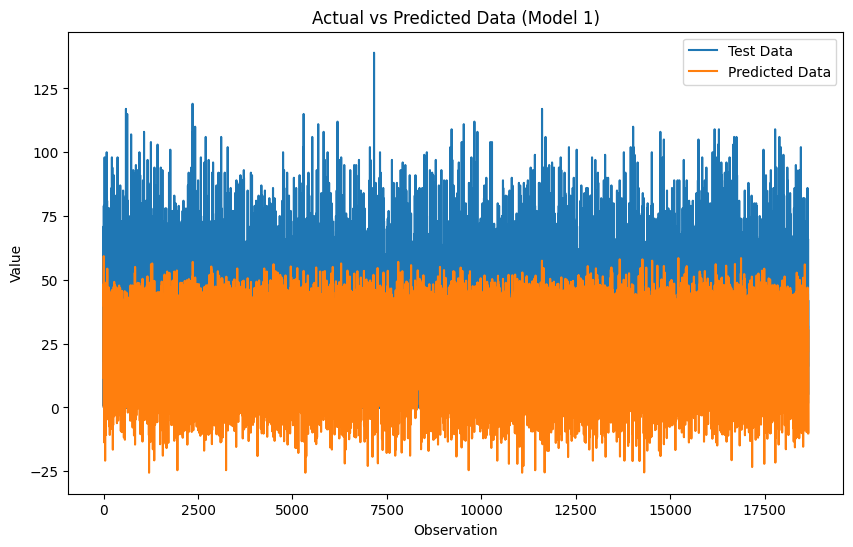

In [24]:
# Create line plot for Model v1
plt.figure(figsize=(10, 6))

plt.plot(y_test, label='Test Data')
plt.plot(y_pred_v1, label='Predicted Data')
plt.legend()
plt.title('Actual vs Predicted Data (Model 1)')
plt.xlabel('Observation')
plt.ylabel('Value')

plt.show()

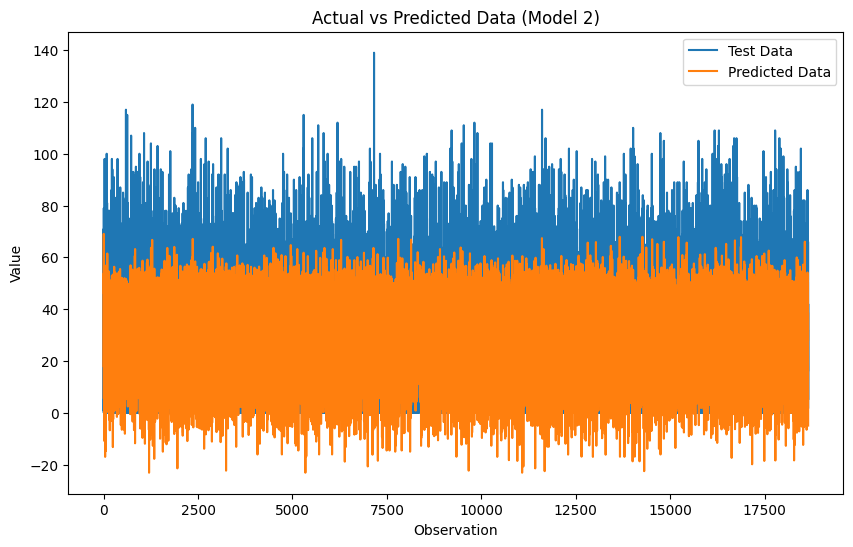

In [25]:
# Create line plot for Model v2
plt.figure(figsize=(10, 6))

plt.plot(y_test, label='Test Data')
plt.plot(y_pred_v2, label='Predicted Data')
plt.legend()
plt.title('Actual vs Predicted Data (Model 2)')
plt.xlabel('Observation')
plt.ylabel('Value')

plt.show()

## Conclusion

Based on our findings, the developed model using stochastic gradient descent regression provides a decent prediction for the number of people visiting the gym based on the given features. However, it is worth noting that the model's accuracy is limited, and there is room for improvement. The model's performance can be improved by including additional features that can better capture the patterns and relationships within the dataset. Also, the model can be improved by experimenting with different hyperparameters to achieve better performance.

According to our analysis, the `hour`, `temperature`, and `is_during_semester` variables were the most significant predictors of the number of people visiting the gym. The best times for going to the gym would be during off-peak hours, preferably on weekdays, and when the temperature is mild or cool. Also, it appears that the gym is less busy during the semester, which may be due to the students having more classes and other academic activities.

In conclusion, based on the current model's findings, the number of people visiting the gym is mainly affected by the `hour`, `temperature`, and `is_during_semester`. However, the developed model's accuracy is limited and can be improved by incorporating additional features and experimenting with different hyperparameters. Therefore, we recommend collecting more data and optimizing the model further to provide better predictions.